In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

# 데이터 폴더 경로 설정
data_folder = 'data'

# 데이터 파일 목록 확인
files = os.listdir(data_folder)
print("files in data folder:")
for file in files:
    print(f"- {file}")

files in data folder:
- 2022_PF_0002528_01_env.xlsx
- 2022_PF_0002528_01_growth.xlsx
- 2022_PF_0020356_01_env.xlsx
- 2022_PF_0020356_01_growth.xlsx
- 2022_PF_0022122_01_env.xlsx
- 2022_PF_0022122_01_growth.xlsx


In [55]:
# 첫 번째 파일 열기
file1_path = os.path.join(data_folder, files[0])
# pip install openpyxl
df1 = pd.read_excel(file1_path, skiprows = 1)
df1 = df1.dropna(axis=1, how='all')  # 모든 값이 NaN인 열 제거
df1 = df1.drop(columns=['강우감지'], errors='ignore')
df1 = df1.rename(columns={'수집일시': '조사일'})
display(df1.head())
print(f"data size: {df1.shape}")

C:\Users\kimdo\AppData\Roaming\Python\Python312\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,조사일,내부CO2(ppm),이슬점온도(도),내부습도(%),지습(%),일사량(W/m-2·s),외부온도(도),내부온도(도),지온(도),외부풍향(도),외부풍속(m/s)
0,2022-01-20 00:00:00,499.0,10.0,73.0,54.0,0.0,0.0,21.0,15.0,90.0,0.0
1,2022-01-20 01:00:00,496.0,10.0,71.0,54.0,0.0,0.0,20.0,15.0,90.0,0.0
2,2022-01-20 02:00:00,497.0,9.0,70.0,53.0,0.0,-1.0,20.0,14.0,90.0,0.0
3,2022-01-20 03:00:00,500.0,8.0,68.0,53.0,0.0,-1.0,20.0,14.0,90.0,0.0
4,2022-01-20 04:00:00,502.0,8.0,68.0,53.0,0.0,-2.0,20.0,14.0,90.0,0.0


data size: (4608, 11)


In [56]:
file2_path = os.path.join(data_folder, files[1])
df2 = pd.read_excel(file2_path, skiprows = 1)
print(f"\n{files[0]} file preview:")
display(df2.head())
print(f"data size: {df2.shape}")


2022_PF_0002528_01_env.xlsx file preview:


C:\Users\kimdo\AppData\Roaming\Python\Python312\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,조사일,주차,생장길이(cm),화방높이(cm),줄기굵기(mm),엽장(cm),엽폭(cm),엽수(개),개화군(점),착과군(점),열매수(개),최종화방번호(번)
0,2022-01-20,1,40.0,0.0,2.0,37.0,20.0,2.0,0.0,0.0,0.0,0.0
1,2022-01-24,2,7.0,0.0,41.0,78.0,18.0,2.0,0.0,0.0,0.0,0.0
2,2022-02-07,3,132.0,0.0,4.0,237.0,162.0,4.0,0.0,0.0,0.0,0.0
3,2022-02-17,4,227.0,4.0,6.0,347.0,182.0,6.0,0.0,0.0,0.0,1.0
4,2022-02-21,5,191.0,93.0,9.0,436.0,238.0,7.0,0.0,0.0,0.0,1.0


data size: (25, 12)


In [ ]:
df1['조사일'] = pd.to_datetime(df1['조사일']) # 조사일을 datetime 형식으로 변환
df1['날짜'] = df1['조사일'].dt.date # 날짜 부분만 추출하여 새로운 열 생성
df1_daily = df1.groupby('날짜').mean().reset_index() # 날짜별로 그룹화하여 평균 계산
df1_daily['조사일'] = pd.to_datetime(df1_daily['날짜']) # 날짜 열을 datetime 형식으로 다시 변환
df1_daily = df1_daily.drop('날짜', axis=1)
df1_daily # 결과 확인

df2['조사일'] = pd.to_datetime(df2['조사일'])
merged_df = pd.merge(df1_daily, df2, on='조사일', how='inner')
display(merged_df.head())
print(f"병합된 데이터 크기: {merged_df.shape}")

,조사일,내부CO2(ppm),이슬점온도(도),내부습도(%),지습(%),일사량(W/m-2·s),외부온도(도),내부온도(도),지온(도),외부풍향(도),외부풍속(m/s)
0,2022-01-20,480.291667,10.041667,66.791667,53.625000,121.041667,-1.500000,21.916667,16.083333,90.000000,0.000000
1,2022-01-21,518.375000,9.958333,67.541667,53.458333,100.750000,-0.666667,21.083333,15.333333,97.500000,0.000000
2,2022-01-22,539.416667,12.750000,73.958333,54.541667,88.958333,6.333333,22.458333,15.958333,195.000000,0.000000
3,2022-01-23,783.958333,15.652174,63.458333,4.739130,59.391304,6.260870,12.500000,1.347826,97.826087,0.000000
4,2022-01-24,675.208333,15.608696,61.166667,0.000000,71.391304,4.391304,11.625000,0.000000,183.913043,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
187,2022-07-26,395.916667,24.375000,85.500000,40.958333,258.916667,25.541667,29.000000,30.583333,270.000000,0.791667
188,2022-07-27,388.625000,23.750000,83.750000,34.625000,283.875000,26.041667,28.708333,29.125000,270.000000,1.250000
189,2022-07-28,389.791667,25.125000,83.000000,34.458333,292.666667,27.333333,30.166667,31.166667,270.000000,1.250000
190,2022-07-29,410.666667,26.130435,84.541667,34.652174,262.217391,28.391304,30.750000,31.869565,270.000000,0.478261


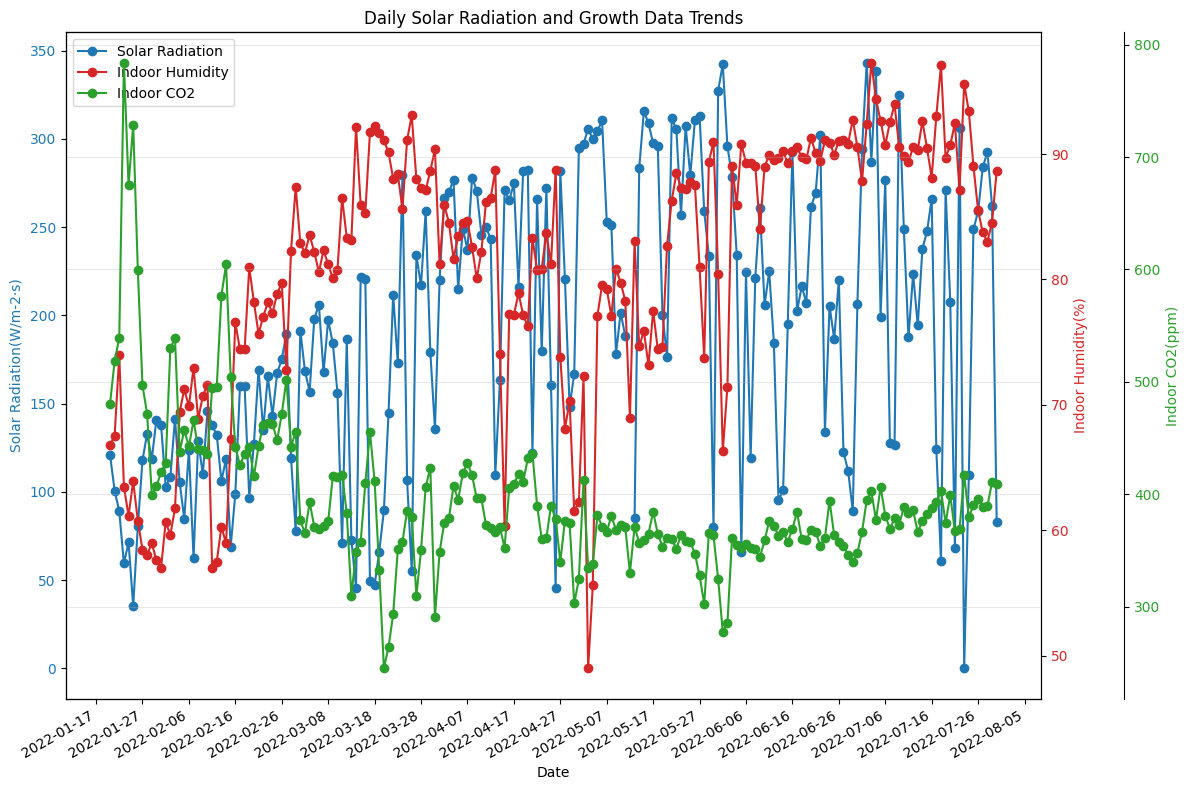

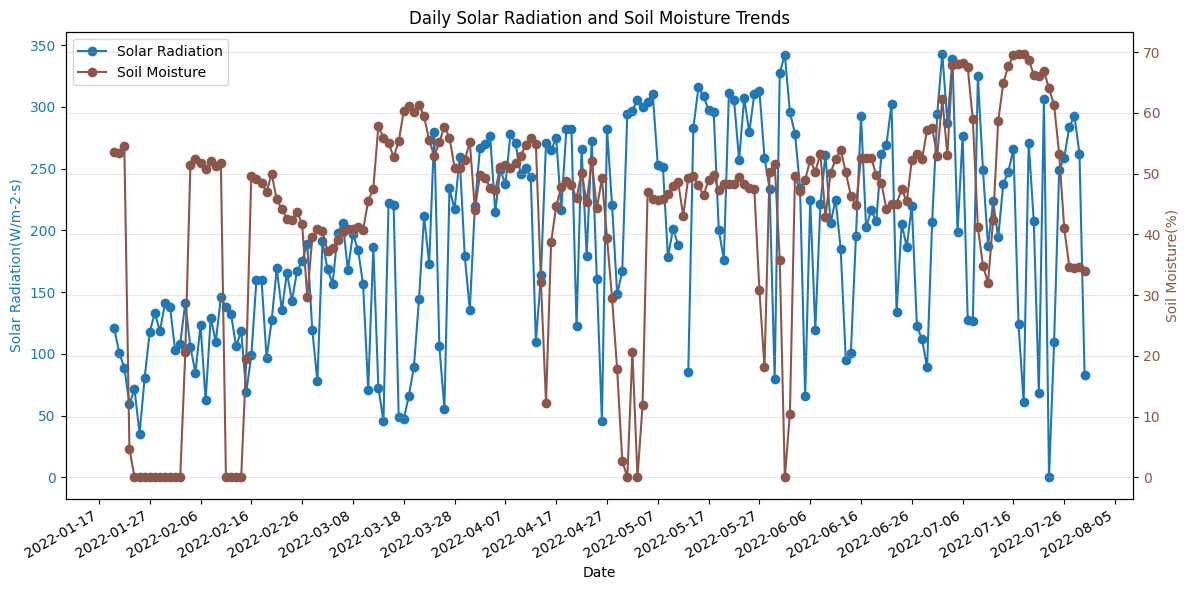

In [69]:
import matplotlib.dates as mdates
# Time series visualization of solar radiation and growth data
plt.figure(figsize=(12, 8))

# Main y-axis setup (Solar Radiation)
ax1 = plt.gca()
ax1.set_xlabel('Date')
ax1.set_ylabel('Solar Radiation(W/m-2·s)', color='tab:blue')
ax1.plot(df1_daily['조사일'], df1_daily['일사량(W/m-2·s)'], 'o-', color='tab:blue', label='Solar Radiation')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Secondary y-axis setup (Indoor Humidity)
ax2 = ax1.twinx()
ax2.set_ylabel('Indoor Humidity(%)', color='tab:red')
ax2.plot(df1_daily['조사일'], df1_daily['내부습도(%)'], 'o-', color='tab:red', label='Indoor Humidity')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Tertiary y-axis setup (Indoor CO2)
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Adjust to avoid overlap with second y-axis
ax3.set_ylabel('Indoor CO2(ppm)', color='tab:green')
ax3.plot(df1_daily['조사일'], df1_daily['내부CO2(ppm)'], 'o-', color='tab:green', label='Indoor CO2')
ax3.tick_params(axis='y', labelcolor='tab:green')

# X-axis date format setup
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))  # Display dates at 10-day intervals
plt.gcf().autofmt_xdate()  # Auto-format date labels

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax1.legend(lines1 + lines2 + lines3, labels1 + labels2 + labels3, loc='upper left')

# Set title
plt.title('Daily Solar Radiation and Growth Data Trends')
plt.grid(True, alpha=0.3)

# Display graph
plt.tight_layout()
plt.show()

# Additional graph: Solar Radiation and Soil Moisture relationship
plt.figure(figsize=(12, 6))

# Solar Radiation and Soil Moisture visualization
ax1 = plt.gca()
ax1.set_xlabel('Date')
ax1.set_ylabel('Solar Radiation(W/m-2·s)', color='tab:blue')
ax1.plot(df1_daily['조사일'], df1_daily['일사량(W/m-2·s)'], 'o-', color='tab:blue', label='Solar Radiation')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Secondary y-axis setup (Soil Moisture)
ax2 = ax1.twinx()
ax2.set_ylabel('Soil Moisture(%)', color='tab:brown')
ax2.plot(df1_daily['조사일'], df1_daily['지습(%)'], 'o-', color='tab:brown', label='Soil Moisture')
ax2.tick_params(axis='y', labelcolor='tab:brown')

# X-axis date format setup
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gcf().autofmt_xdate()

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Set title
plt.title('Daily Solar Radiation and Soil Moisture Trends')
plt.grid(True, alpha=0.3)

# Display graph
plt.tight_layout()
plt.show()